**Importing Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# URL of the data
url = "https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/1000d81c-5bb5-49e8-a9ab-44cd042f1db2/download/fy2023-property-assessment-data.csv"
df = pd.read_csv(url)
df.head(5)

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN


Cleaning Data my Removing Outliers

In [ ]:
lstdrop = ['ST_NUM','TT_RMS','FIREPLACES','RES_FLOOR','KITCHENS','HLF_BTH','FULL_BTH','BED_RMS','ZIP_CODE','GROSS_AREA','YR_BUILT','LAND_SF','BLDG_VALUE','TOTAL_VALUE']
for x in lstdrop:
    df.dropna(subset=[x], inplace=True)

df['GROSS_TAX'] = df['GROSS_TAX'].fillna(0)
df['LIVING_AREA'] = df['LIVING_AREA'].fillna(0)
df['NUM_PARKING'] = df['NUM_PARKING'].fillna(0)
df['PROP_VIEW'] = df['PROP_VIEW'].fillna('U - Unknown')
df['BLDG_TYPE'] = df['BLDG_TYPE'].fillna('NoBld')
df['AGE'] = 2023 - df['YR_BUILT']
df['AC_TYPE'] = df['AC_TYPE'].fillna('N - None')
df['HEAT_TYPE'] = df['HEAT_TYPE'].fillna('N - None')
df['KITCHEN_TYPE'] = df['KITCHEN_TYPE'].fillna('N - None')
df['BTHRM_STYLE1'] = df['BTHRM_STYLE1'].fillna('N - No Remodeling')
df['BDRM_COND'] = df['BDRM_COND'].fillna('U - Unknown')
df['OVERALL_COND'] = df['OVERALL_COND'].fillna('U - Unknown')
df['EXT_COND'] = df['EXT_COND'].fillna('U - Unknown')
df['INT_COND'] = df['INT_COND'].fillna('U - Unknown')
df['EXT_FNISHED'] = df['EXT_FNISHED'].fillna('U - Unknown')
df['INT_WALL'] = df['INT_WALL'].fillna('U - Unknown')
df['ROOF_STRUCTURE'] = df['ROOF_STRUCTURE'].fillna('U - Unknown')
df['STRUCTURE_CLASS'] = df['STRUCTURE_CLASS'].fillna('U - Unknown')
df['YR_REMODEL'] = df['YR_REMODEL'].fillna(df['YR_BUILT'])
# List of columns to delete
columns_to_delete = ['CM_ID','GIS_ID','UNIT_NUM','RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS','RC_UNITS','YR_BUILT',
       'BTHRM_STYLE3','BTHRM_STYLE2','KITCHEN_STYLE1', 'KITCHEN_STYLE2','HEAT_FUEL','ROOF_COVER',
       'PROP_VIEW','PID','OWN_OCC','OWNER','OWNER MAIL ADDRESS','LUC','LU_DESC','BLDG_SEQ','CORNER_UNIT','ORIENTATION','KITCHEN_STYLE3']

# Delete columns in the list
df.drop(columns=columns_to_delete, inplace=True)
# Identify integer columns
int_columns = df.select_dtypes(include=['int']).columns
# Apply fillna() to integer columns
df[int_columns] = df[int_columns].fillna(0)
df

,ST_NUM,ST_NAME,CITY,ZIP_CODE,NUM_BLDGS,LU,BLDG_TYPE,LAND_SF,GROSS_AREA,LIVING_AREA,...,KITCHENS,TT_RMS,BDRM_COND,BTHRM_STYLE1,KITCHEN_TYPE,HEAT_TYPE,AC_TYPE,FIREPLACES,NUM_PARKING,AGE
0,104.0,PUTNAM ST,EAST BOSTON,2128.0,1,R3,RE - Row End,1150.0,3353.0,2202.0,...,3.0,12.0,U - Unknown,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,3.0,123.0
1,197.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3299.0,2307.0,...,3.0,9.0,U - Unknown,M - Modern,3F - 3 Full Eat In Kitchens,F - Forced Hot Air,C - Central AC,0.0,0.0,103.0
2,199.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3392.0,2268.0,...,3.0,13.0,U - Unknown,M - Modern,3F - 3 Full Eat In Kitchens,S - Space Heat,N - None,0.0,0.0,118.0
3,201.0,Lexington ST,EAST BOSTON,2128.0,1,R3,RM - Row Middle,1150.0,3108.0,2028.0,...,3.0,11.0,U - Unknown,S - Semi-Modern,3F - 3 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,0.0,123.0
4,203.0,Lexington ST,EAST BOSTON,2128.0,1,R2,RE - Row End,2010.0,3700.0,2546.0,...,2.0,13.0,U - Unknown,S - Semi-Modern,2F - 2 Full Eat In Kitchens,W - Ht Water/Steam,N - None,0.0,0.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180617,20.0,Lake ST,BRIGHTON,2135.0,1,R1,SD - Semi-Det,3778.0,4240.0,2390.4,...,1.0,10.0,U - Unknown,S - Semi-Modern,1F - 1 Full Eat In Kitchens,W - Ht Water/Steam,N - None,2.0,3.0,103.0
180618,18.0,Lake ST,BRIGHTON,2135.0,1,R2,CV - Conventional,5333.0,4609.0,2951.6,...,2.0,11.0,U - Unknown,M - Modern,2F - 2 Full Eat In Kitchens,F - Forced Hot Air,N - None,0.0,3.0,103.0
180620,14.0,Lake ST,BRIGHTON,2135.0,1,CD,FS - Free Standing,2777.0,2777.0,1410.0,...,1.0,8.0,A - Average,M - Modern,F - Full Eat In,W - Ht Water/Steam,N - None,1.0,1.0,103.0
180621,12.0,Lake ST,BRIGHTON,2135.0,1,CD,FS - Free Standing,1401.0,1401.0,1401.0,...,1.0,7.0,A - Average,S - Semi-Modern,F - Full Eat In,W - Ht Water/Steam,N - None,1.0,1.0,103.0


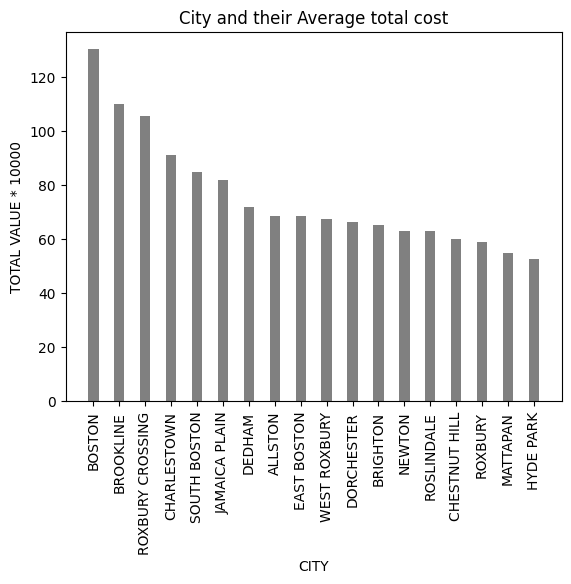

In [ ]:
result = df.groupby('CITY')['TOTAL_VALUE'].agg('mean')
result = result.reset_index().rename(columns={'TOTAL_VALUE': 'MEAN'})
result = result.sort_values(by = 'MEAN', ascending=False).round()
plt.bar(result['CITY'], result['MEAN']/10000, color='grey',width = 0.4)
# Set plot title and labels
plt.title("City and their Average total cost")
plt.xlabel("CITY")
plt.ylabel("TOTAL VALUE * 10000")
plt.xticks(rotation=90)
(plt.show())

<ipython-input-5-e824f2a1733d>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = df.corr()


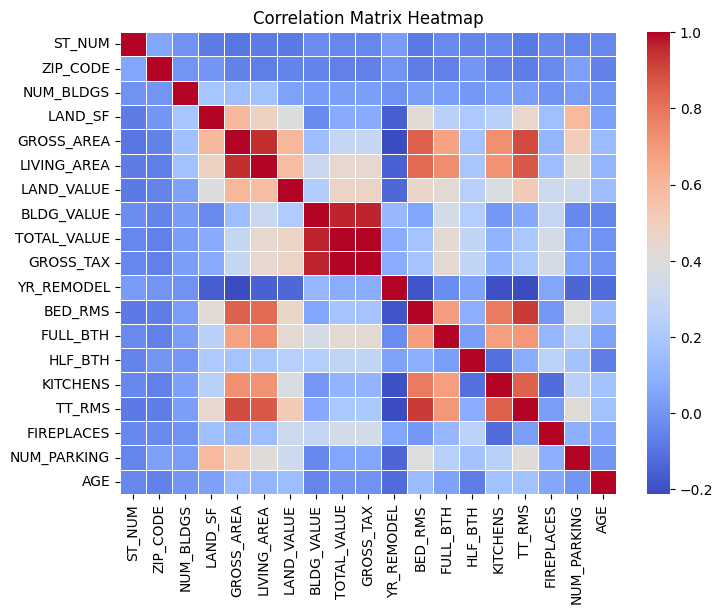

In [ ]:
# Visualising the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
df_corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

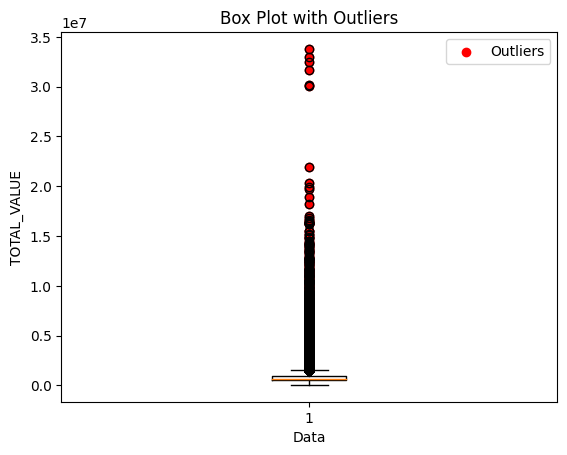

In [ ]:
# Calculate the mean and standard deviation
mean = np.mean(df['TOTAL_VALUE'])
std_dev = np.std(df['TOTAL_VALUE'])

# Define a threshold for identifying outliers (three standard deviations away)
threshold = 3 * std_dev

# Identify outliers
outliers = [x for x in df['TOTAL_VALUE'] if abs(x - mean) > threshold]

# Create a box plot with outliers highlighted
plt.boxplot(df['TOTAL_VALUE'])
plt.scatter([1] * len(outliers), outliers, c='red', marker='o', label='Outliers')
# Add labels and title
plt.xlabel('Data')
plt.ylabel('TOTAL_VALUE')
plt.title('Box Plot with Outliers')

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Delete Outlier
# Calculate the mean and standard deviation
mean = np.mean(df['TOTAL_VALUE'])
std_dev = np.std(df['TOTAL_VALUE'])

# Define a threshold for identifying outliers (three standard deviations away)
threshold = 2 * std_dev

# Identify outliers
outliers = [x for x in df['TOTAL_VALUE'] if abs(x - mean) > threshold]

df = df[~df['TOTAL_VALUE'].isin(outliers)]

In [ ]:
miss = pd.DataFrame(df)
# Check for missing values and count them in each column
missing_values = miss.isnull().sum()
# Print missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ST_NUM             0
ST_NAME            0
CITY               0
ZIP_CODE           0
NUM_BLDGS          0
LU                 0
BLDG_TYPE          0
LAND_SF            0
GROSS_AREA         0
LIVING_AREA        0
LAND_VALUE         0
BLDG_VALUE         0
TOTAL_VALUE        0
GROSS_TAX          0
YR_REMODEL         0
STRUCTURE_CLASS    0
ROOF_STRUCTURE     0
INT_WALL           0
EXT_FNISHED        0
INT_COND           0
EXT_COND           0
OVERALL_COND       0
BED_RMS            0
FULL_BTH           0
HLF_BTH            0
KITCHENS           0
TT_RMS             0
BDRM_COND          0
BTHRM_STYLE1       0
KITCHEN_TYPE       0
HEAT_TYPE          0
AC_TYPE            0
FIREPLACES         0
NUM_PARKING        0
AGE                0
dtype: int64


In [ ]:
# Get the list of column names with categorical data types and then perform one hot encoding on it
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for X in categorical_columns:
    df = pd.get_dummies(df, columns=[X])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression

# Split the dataset into features and target variable
X = df.drop('TOTAL_VALUE', axis=1)
y = df['TOTAL_VALUE']

from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)

train_predictions = rf_regressor.predict(X_train)

train_mse = mean_squared_error(y_train, train_predictions)
print(f"Training Mean Squared Error: {train_mse}")

predictions = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Training Mean Squared Error: 747.5403531629977
Mean Squared Error: 9892.330300140848


In [ ]:
from sklearn.metrics import r2_score

# Fit the model and make predictions on the training set
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
train_predictions = rf_regressor.predict(X_train)

# Calculate R-squared value for training data
r2_train = r2_score(y_train, train_predictions)

print("R-squared value on training set:", r2_train)

R-squared value on training set: 0.9999999946080783


In [ ]:
# Make predictions on the test set
test_predictions = rf_regressor.predict(X_test)

# Calculate R-squared value for test data
r2_test = r2_score(y_test, test_predictions)

print("R-squared value on test set:", r2_test)

R-squared value on test set: 0.9999999279450406


In [ ]:
# Calculate the number of predictors in the model
num_predictors = X_test.shape[1]

# Calculate the total number of data points in the test set
num_samples = len(y_test)

# Calculate the degrees of freedom for the model (N - p - 1)
degrees_of_freedom = num_samples - num_predictors - 1

# Calculate the mean squared error for the test set predictions
mse_test = ((y_test - test_predictions) ** 2).sum() / degrees_of_freedom

# Calculate the mean squared error for the null model (just the mean of the target variable)
mse_null = ((y_test - y_test.mean()) ** 2).sum() / degrees_of_freedom

# Calculate adjusted R-squared using the formula: 1 - (MSE(model) / MSE(null)) * (N - 1) / (N - p - 1)
adjusted_r2_test = 1 - (mse_test / mse_null) * (num_samples - 1) / degrees_of_freedom

print("Adjusted R-squared value on test set:", adjusted_r2_test)

Adjusted R-squared value on test set: 0.9999999151534926


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# L1 regularization parameter (alpha value)
alpha = 0.1

# Create Lasso regression model with L1 regularization
lasso_regressor = Lasso(alpha=alpha, random_state=42)

# Fit Lasso model to the training data
lasso_regressor.fit(X_train, y_train)

# Make predictions on the training set
train_predictions_lasso = lasso_regressor.predict(X_train)

# Calculate R-squared value for training data with L1 regularization
r2_train_lasso = r2_score(y_train, train_predictions_lasso)

print("R-squared value on training set with L1 regularization:", r2_train_lasso)

# Make predictions on the test set using L1 regularized model
test_predictions_lasso = lasso_regressor.predict(X_test)

# Calculate R-squared value for test data with L1 regularization
r2_test_lasso = r2_score(y_test, test_predictions_lasso)

print("R-squared value on test set with L1 regularization:", r2_test_lasso)

# Calculate the number of predictors in the model
num_predictors = X_test.shape[1]

# Calculate the total number of data points in the test set
num_samples = len(y_test)

# Calculate the degrees of freedom for the model (N - p - 1)
degrees_of_freedom = num_samples - num_predictors - 1

# Calculate the mean squared error for the test set predictions with L1 regularization
mse_test_lasso = mean_squared_error(y_test, test_predictions_lasso)

# Calculate the mean squared error for the null model (just the mean of the target variable)
mse_null = mean_squared_error(y_test, [y_test.mean()] * num_samples)

# Calculate adjusted R-squared using the formula: 1 - (MSE(model) / MSE(null)) * (N - 1) / (N - p - 1)
adjusted_r2_test_lasso = 1 - (mse_test_lasso / mse_null) * (num_samples - 1) / degrees_of_freedom

print("Adjusted R-squared value on test set with L1 regularization:", adjusted_r2_test_lasso)


R-squared value on training set with L1 regularization: 0.9999999499459944
R-squared value on test set with L1 regularization: 0.9999993372936815
Adjusted R-squared value on test set with L1 regularization: 0.9999992196468217


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create Lasso regression model with L1 regularization
lasso_regressor = Lasso(alpha=0.1, random_state=42)

# Create a dictionary of models with their corresponding hyperparameter grids
models = {
    'RandomForest': (rf_regressor, param_grid_rf),
    'Lasso': (lasso_regressor, {})
}

# Perform grid search for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Train the best model on the entire training data
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    test_predictions = best_model.predict(X_test)

    # Calculate R-squared value for the test set
    r2_test = r2_score(y_test, test_predictions)
    print(f"Best {model_name} model with hyperparameter tuning and L1 regularization:")
    print(f"Best Parameters: {best_params}")
    print(f"R-squared value on test set: {r2_test}")


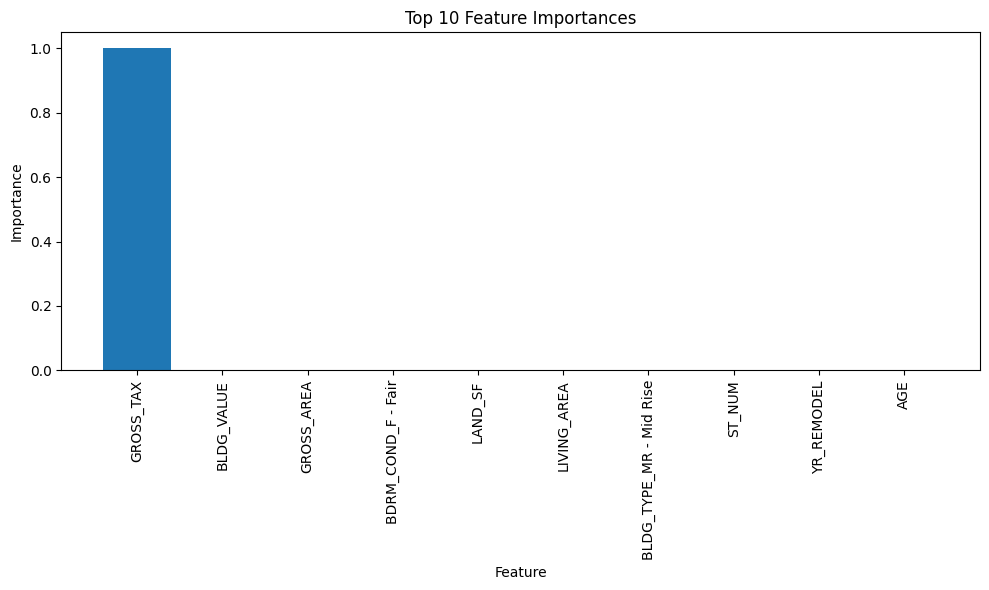

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the Random Forest model
feature_importances = rf_regressor.feature_importances_

# Get the names of features
feature_names = X.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), feature_importances[indices][:10], align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()



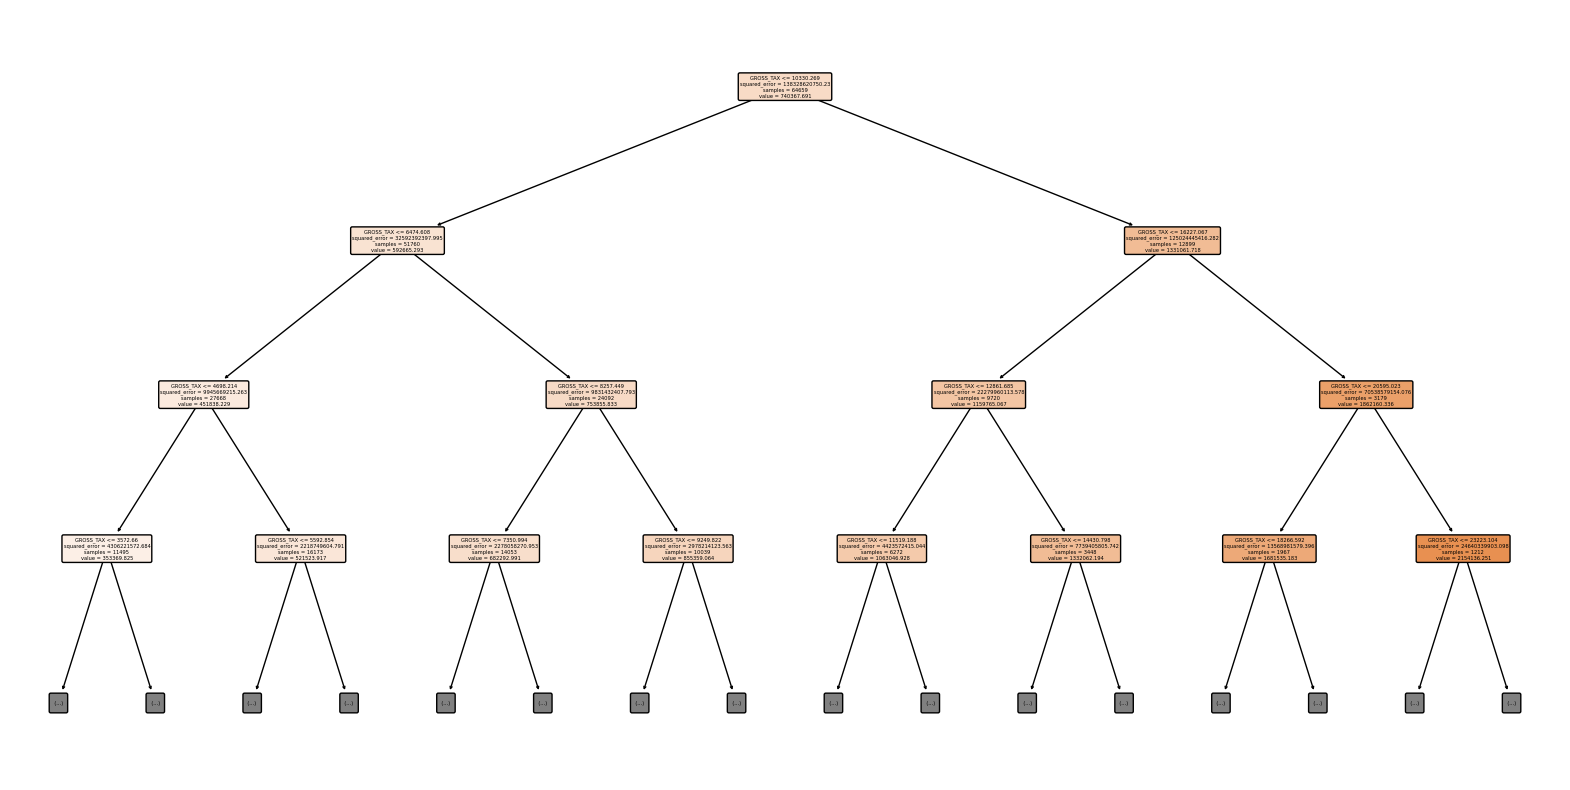

In [ ]:
from sklearn.tree import plot_tree

# Get one of the decision trees from the Random Forest (for example, the first tree)
one_tree = rf_regressor.estimators_[0]

# Visualize the first decision tree with a maximum depth of 4
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=list(X.columns), filled=True, rounded=True, max_depth=3)
plt.show()
